In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('OCD Patient Dataset_ Demographics & Clinical Data.csv')
data.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


## Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 13  Y-B

# Descriptive Statistics

In [4]:
data.describe()

,Patient ID,Age,Duration of Symptoms (months),Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions)
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,5541.254000,46.781333,121.745333,20.048000,19.62600
std,2562.389469,16.830321,67.404610,11.823884,11.78287
min,1017.000000,18.000000,6.000000,0.000000,0.00000
25%,3338.000000,32.000000,64.000000,10.000000,9.00000
50%,5539.500000,47.000000,121.000000,20.000000,20.00000
75%,7745.500000,61.000000,178.000000,31.000000,29.00000
max,9995.000000,75.000000,240.000000,40.000000,40.00000


In [5]:
print(data.describe(include=['O']))

       Gender  Ethnicity Marital Status Education Level OCD Diagnosis Date  \
count    1500       1500           1500            1500               1500   
unique      2          4              3               4               1218   
top      Male  Caucasian         Single    Some College         2017-06-21   
freq      753        398            511             394                  4   

       Previous Diagnoses Family History of OCD Obsession Type  \
count                1252                  1500           1500   
unique                  4                     2              5   
top                   MDD                   Yes   Harm-related   
freq                  345                   760            333   

       Compulsion Type Depression Diagnosis Anxiety Diagnosis     Medications  
count             1500                 1500              1500            1114  
unique               5                    2                 2               3  
top            Washing                

In [6]:
data.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

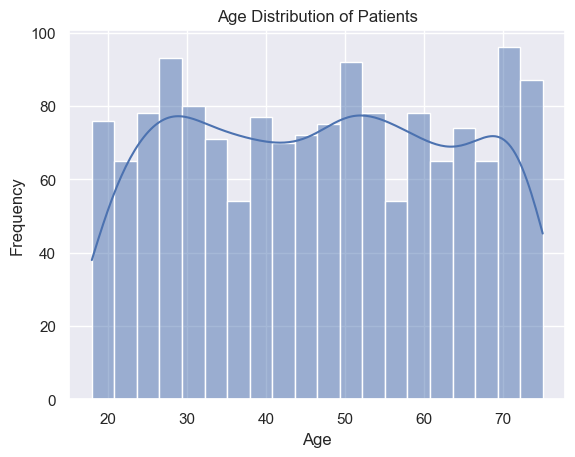

In [7]:
sns.histplot(data['Age'], bins = 20, kde = True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

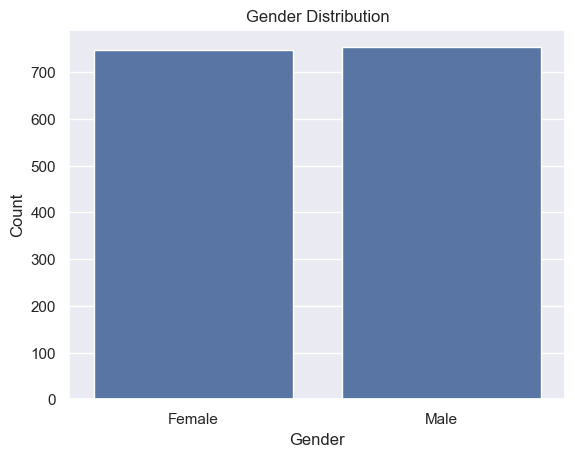

In [8]:
sns.countplot(x = 'Gender', data = data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

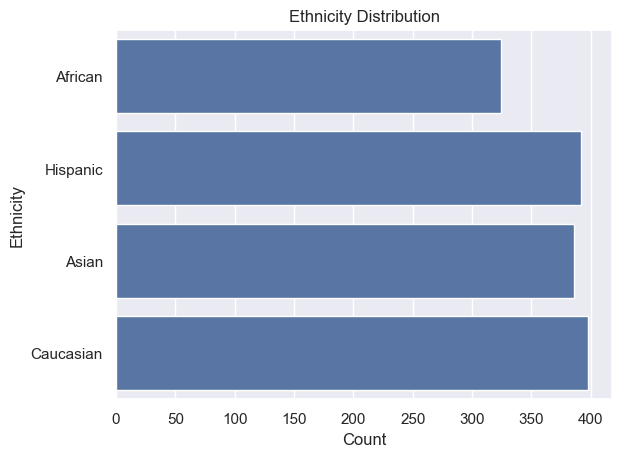

In [9]:
sns.countplot(y = 'Ethnicity', data = data)
plt.title("Ethnicity Distribution")
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.show()

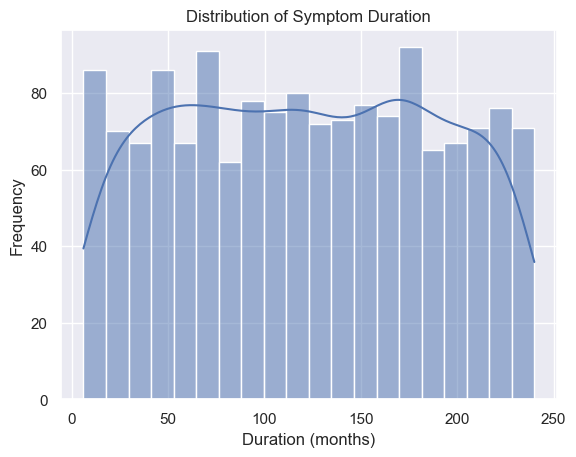

In [10]:
#Distribution of symptom duration

sns.histplot(data['Duration of Symptoms (months)'], bins=20,kde=True)
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()

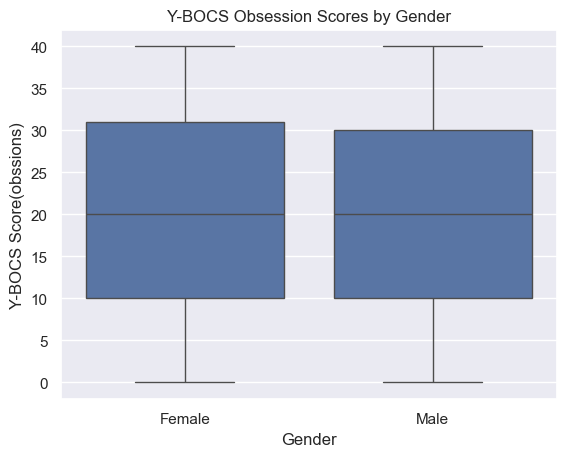

In [11]:
# Boxplot of Y-BOCS Scores by Gender
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=data)
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score(obssions)')
plt.show()

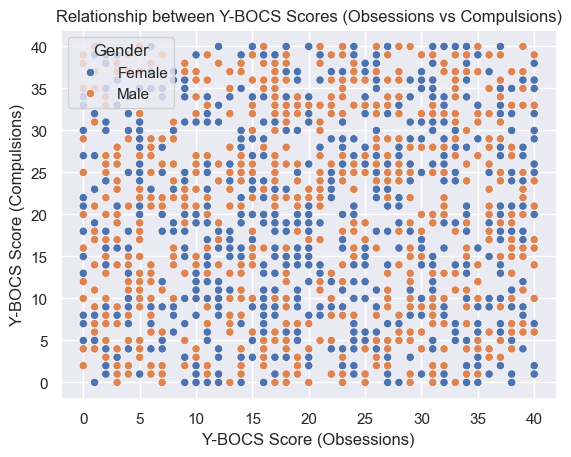

In [12]:
# Relationship between Obsession and Compulsion Y-BOCS Scores
sns.scatterplot(x='Y-BOCS Score (Obsessions)', y='Y-BOCS Score (Compulsions)', hue='Gender', data=data)
plt.title('Relationship between Y-BOCS Scores (Obsessions vs Compulsions)')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.show()

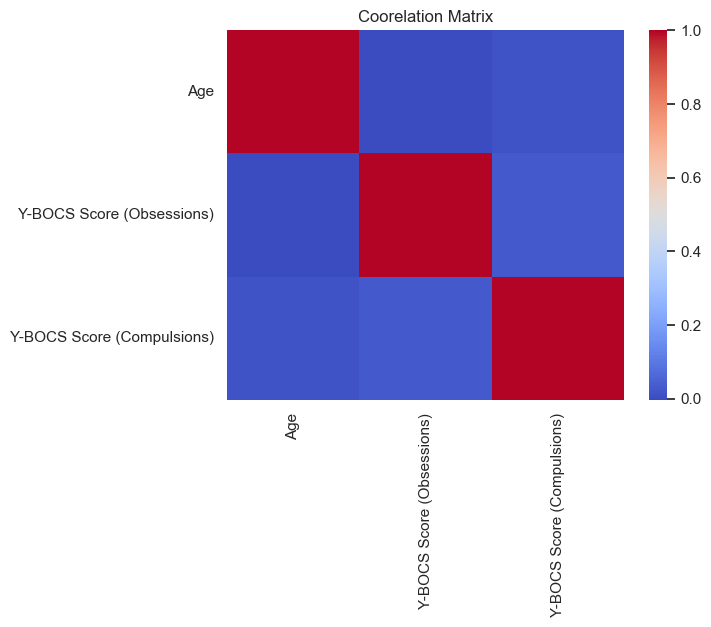

In [13]:
# Coorelation matrix

corr_mat = data[['Age','Y-BOCS Score (Obsessions)','Y-BOCS Score (Compulsions)']].corr()

sns.heatmap(corr_mat,cmap='coolwarm')
plt.title('Coorelation Matrix')
plt.show()

# <center>Preprocessing<center>

## Renaming

In [14]:
data['Gender'] = data['Gender'].replace({'Female': 1, 'Male': 2})
data['Ethnicity'] = data['Ethnicity'].replace({'African':1,'Hispanic':2,'Asian':3,'Caucasian':4})
data['Marital Status'] = data['Marital Status'].replace({'Single':1,'Divorced':2,'Married':3})
data["Education Level"] = data["Education Level"].replace({'Some College':1,'College Degree':2,'High School':3,'Graduate Degree':4})
data["Previous Diagnoses"] = data["Previous Diagnoses"].replace({'MDD':1,'PTSD':2,'GAD':3,'Panic Disorder':4})
data["Family History of OCD"] = data["Family History of OCD"].replace({'No':1,'Yes':2})
data["Obsession Type"] = data["Obsession Type"].replace({'Harm-related':1,'Contamination':2,'Symmetry':3,'Hoarding':4,'Religious':5})
data["Compulsion Type"] = data["Compulsion Type"].replace({'Checking':1,'Washing':2,'Ordering':3,'Praying':4,'Counting':5})
data["Depression Diagnosis"] = data["Depression Diagnosis"].replace({'No':1,'Yes':2})
data["Anxiety Diagnosis"] = data["Anxiety Diagnosis"].replace({'No':1,'Yes':2})
data["Medications"] =data["Medications"].replace({'SNRI':0,'SSRI':1,'Benzodiazepine':2})

C:\Users\ranje\AppData\Local\Temp\ipykernel_15476\1406814938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace({'Female': 1, 'Male': 2})
C:\Users\ranje\AppData\Local\Temp\ipykernel_15476\1406814938.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Ethnicity'] = data['Ethnicity'].replace({'African':1,'Hispanic':2,'Asian':3,'Caucasian':4})
C:\Users\ranje\AppData\Local\Temp\ipykernel_15476\1406814938.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

## Droping

In [15]:
data=data.drop(columns=data[['OCD Diagnosis Date']],axis=1)

In [16]:
data

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,1,203,1.0,1,1,1,17,10,2,2,0.0
1,2406,69,2,1,2,1,180,NaN,2,1,2,21,25,2,2,1.0
2,1188,57,2,2,2,2,173,1.0,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,2,126,2.0,2,3,2,14,28,2,2,1.0
4,5824,56,1,2,3,3,168,2.0,2,4,3,39,18,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,2,53,1.0,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,4,160,3.0,2,4,4,25,16,2,2,1.0
1497,6089,40,2,3,3,1,100,NaN,2,2,5,2,15,2,2,2.0
1498,3808,37,1,4,3,1,210,3.0,2,2,2,16,7,2,1,2.0


## Skewness and Kurtosis of Previous Diagnoses

In [17]:
data['Previous Diagnoses'].skew()

0.04078745453752826

In [18]:
data['Previous Diagnoses'].kurt()

-1.4093708569884518

### Imputation

In [19]:
data.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

In [20]:
data = data.dropna(axis=0,how='any')
data

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,1,203,1.0,1,1,1,17,10,2,2,0.0
2,1188,57,2,2,2,2,173,1.0,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,2,126,2.0,2,3,2,14,28,2,2,1.0
5,6946,32,1,3,3,2,46,3.0,1,4,3,26,11,2,2,1.0
6,9861,38,1,2,1,2,110,1.0,1,2,4,12,16,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,8854,40,1,3,2,3,177,1.0,2,1,5,27,21,2,2,0.0
1494,5657,72,2,2,2,4,238,1.0,2,3,2,14,25,1,2,0.0
1495,5374,38,2,2,2,2,53,1.0,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,4,160,3.0,2,4,4,25,16,2,2,1.0


In [21]:
from sklearn.impute import SimpleImputer
num_cols = ['Previous Diagnoses']
num_imp = SimpleImputer(strategy='mean')
data[num_cols] = pd.DataFrame(num_imp.fit_transform(data[num_cols]),columns=num_cols)
data

C:\Users\ranje\AppData\Local\Temp\ipykernel_15476\3312837075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[num_cols] = pd.DataFrame(num_imp.fit_transform(data[num_cols]),columns=num_cols)


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,1,203,1.0,1,1,1,17,10,2,2,0.0
2,1188,57,2,2,2,2,173,2.0,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,2,126,3.0,2,3,2,14,28,2,2,1.0
5,6946,32,1,3,3,2,46,2.0,1,4,3,26,11,2,2,1.0
6,9861,38,1,2,1,2,110,3.0,1,2,4,12,16,2,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,8854,40,1,3,2,3,177,NaN,2,1,5,27,21,2,2,0.0
1494,5657,72,2,2,2,4,238,NaN,2,3,2,14,25,1,2,0.0
1495,5374,38,2,2,2,2,53,NaN,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,4,160,NaN,2,4,4,25,16,2,2,1.0


<Axes: >

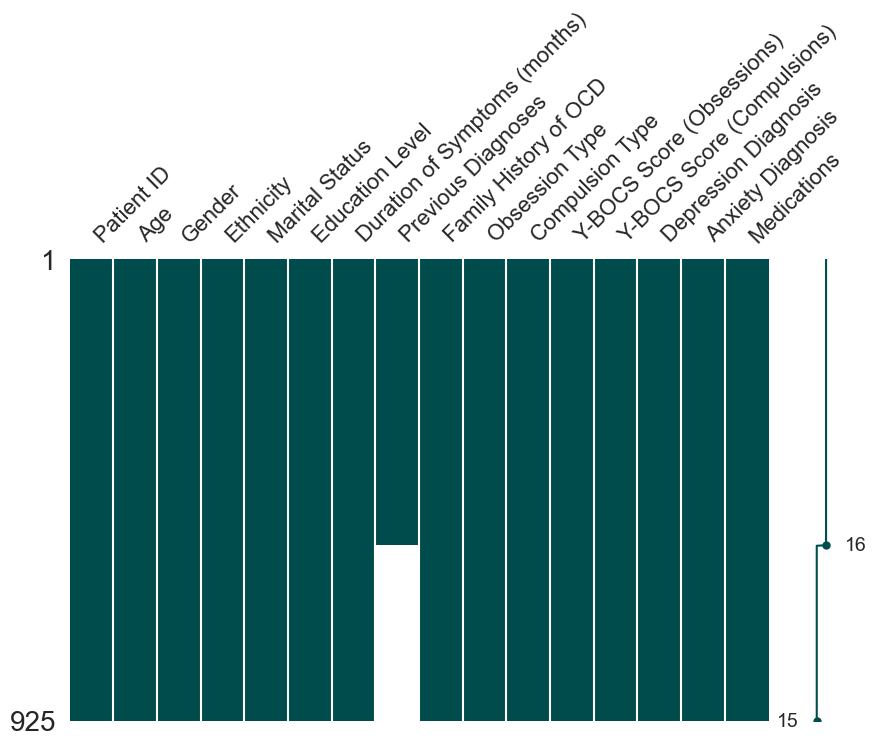

In [22]:
import missingno as msno
msno.matrix(df=data,figsize=(10,6),color=(0,.3,.3))

In [23]:
data_feature = data.columns.drop('Medications').tolist()
data_feature

['Patient ID',
 'Age',
 'Gender',
 'Ethnicity',
 'Marital Status',
 'Education Level',
 'Duration of Symptoms (months)',
 'Previous Diagnoses',
 'Family History of OCD',
 'Obsession Type',
 'Compulsion Type',
 'Y-BOCS Score (Obsessions)',
 'Y-BOCS Score (Compulsions)',
 'Depression Diagnosis',
 'Anxiety Diagnosis']

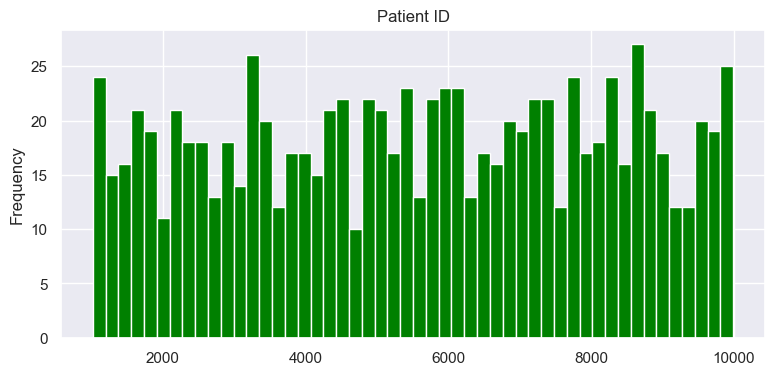

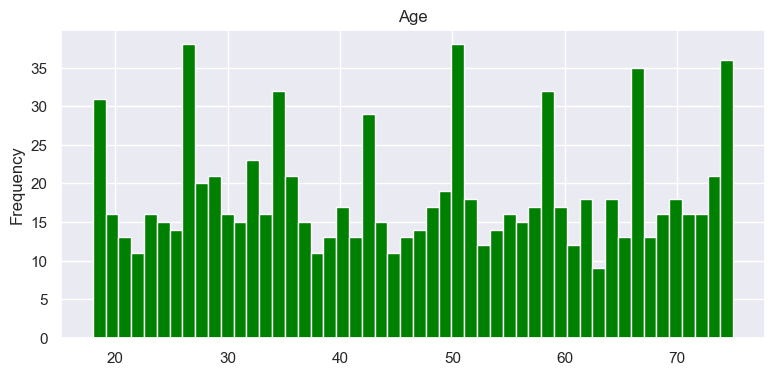

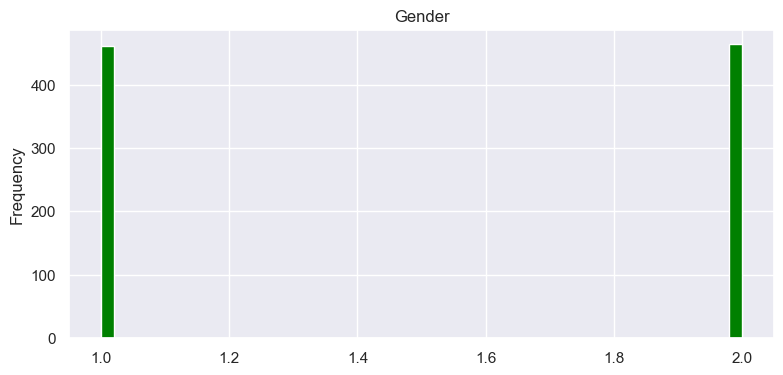

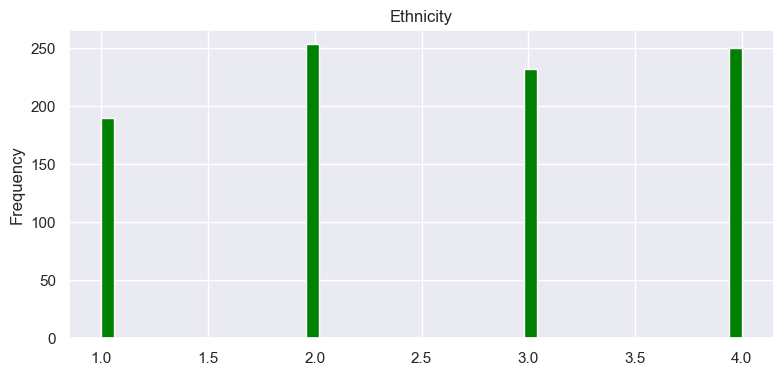

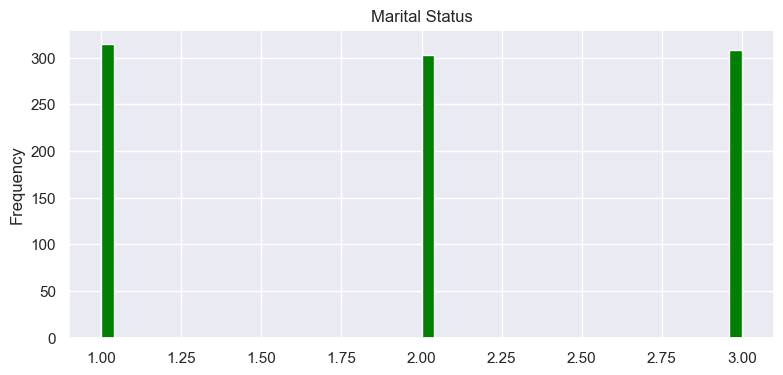

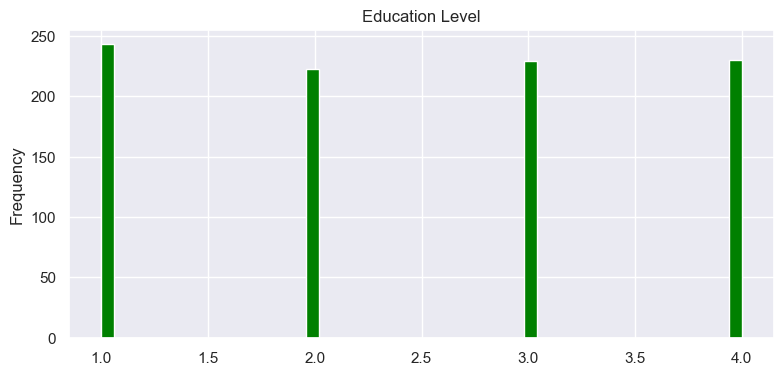

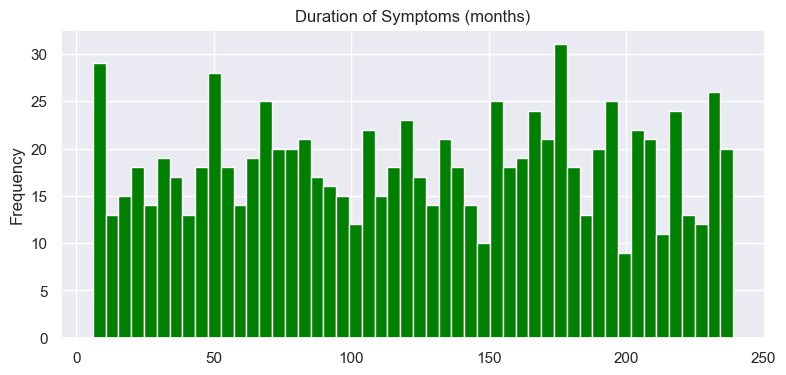

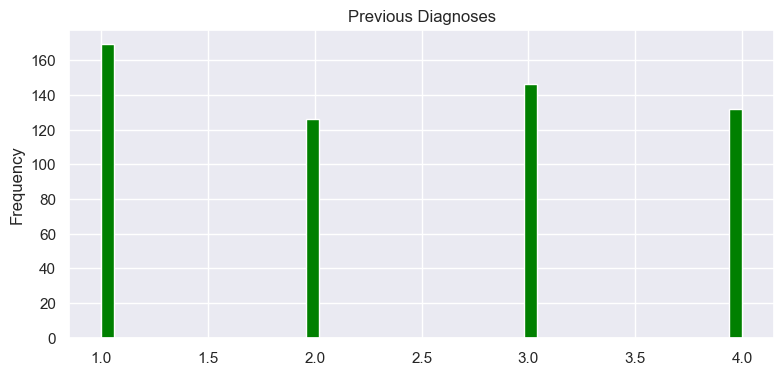

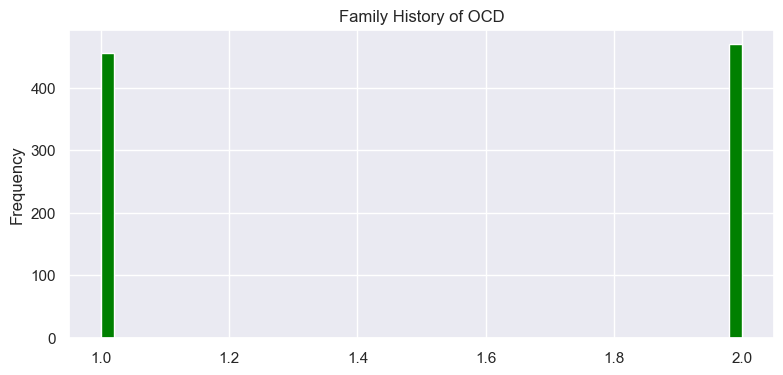

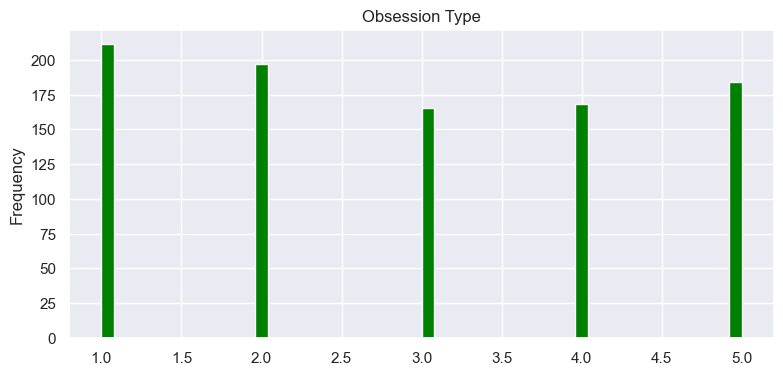

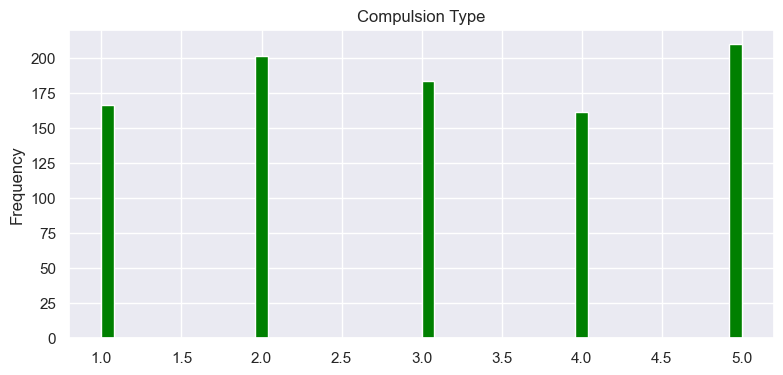

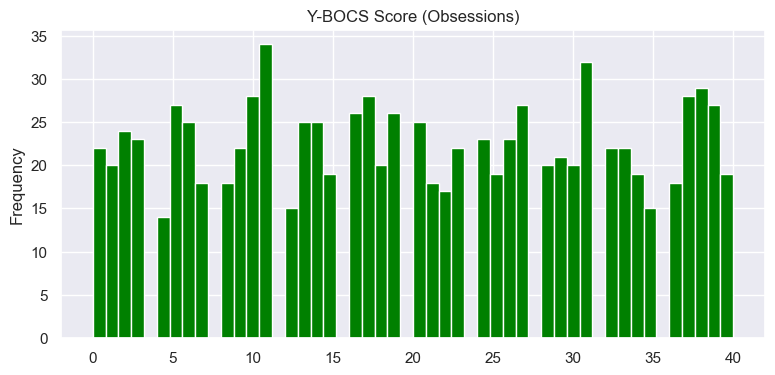

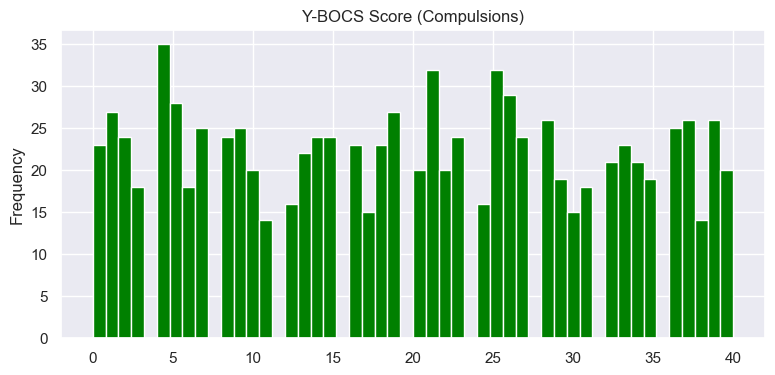

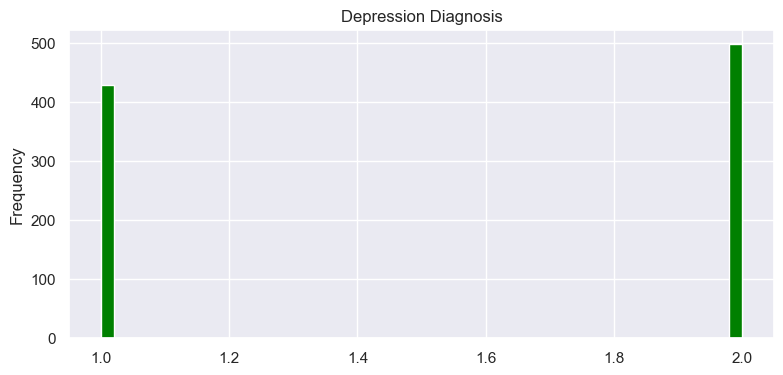

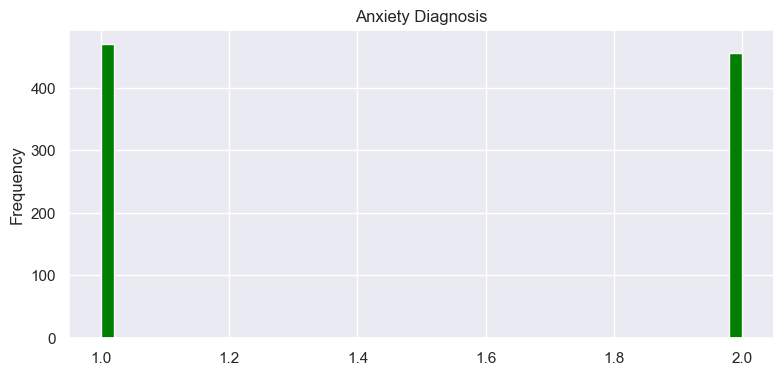

In [24]:
for i in data_feature:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    data[i].plot(kind='hist',bins=50,color='green')
    plt.title(i)
    plt.show()

In [25]:
data.isnull().sum()

Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
Duration of Symptoms (months)      0
Previous Diagnoses               352
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                        0
dtype: int64

In [26]:
data_feature.remove('Patient ID')
for i in data_feature:
    print(i)
    print("Kurtosis: ",data[i].kurt())
    print("Skewness: ",data[i].skew())

Age
Kurtosis:  -1.2270793648977154
Skewness:  0.024594829533256524
Gender
Kurtosis:  -2.0042960915239147
Skewness:  -0.006497061125457653
Ethnicity
Kurtosis:  -1.3031945333239636
Skewness:  -0.0709421269472646
Marital Status
Kurtosis:  -1.5143663113409969
Skewness:  0.011986555985725584
Education Level
Kurtosis:  -1.3836812262087816
Skewness:  0.014986040382371831
Duration of Symptoms (months)
Kurtosis:  -1.2022182525029614
Skewness:  -0.02339381297048957
Previous Diagnoses
Kurtosis:  -1.4078214573837584
Skewness:  0.06486336190630641
Family History of OCD
Kurtosis:  -2.0035438848171854
Skewness:  -0.028156564302340238
Obsession Type
Kurtosis:  -1.3522169038321394
Skewness:  0.09902529150304283
Compulsion Type
Kurtosis:  -1.31689307651376
Skewness:  0.009399473674205377
Y-BOCS Score (Obsessions)
Kurtosis:  -1.1924648145861443
Skewness:  0.017465550019103597
Y-BOCS Score (Compulsions)
Kurtosis:  -1.195443935191136
Skewness:  0.016653099346611556
Depression Diagnosis
Kurtosis:  -1.981834

# <center>Feature Selection<center>

In [28]:
x = data.drop(columns=[['Medications','Previous Diagnoses']], axis=1)
y = data[['Medications']]

KeyError: "[('Medications', 'Previous Diagnoses')] not found in axis"

In [ ]:
x.drop(['Previous Diagnoses'], axis=1)

In [30]:
from xgboost import XGBClassifier

In [31]:
model = [XGBClassifier()]

In [32]:
model = [model[i].fit(x,y) for i in range(len(model))]

In [ ]:
model

In [ ]:
corr = data.corr(method='pearson')
plt.subplots(figsize=(15,15))
sns.heatmap(corr, cmap='RdBu', annot=True,fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
x = MinMaxScaler.fit_transform(x)
X = pd.DataFrame(x)
X.drop([7], axis=1)

## <center>MODELING<center>

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
x_train.drop([7], axis=1)

In [ ]:
x_train.dropna()
y_train.dropna()

In [ ]:
x_train.isnull().sum()

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier

In [42]:
m1 = SVC()
m2 = LGBMClassifier()
m3 = LogisticRegression()
m4 = SGDClassifier()
m5 = XGBClassifier(objective='multi:softmax')
m6 = KNeighborsClassifier()
m7 = RandomForestClassifier()
m8 = ExtraTreesClassifier()
m9 = HistGradientBoostingClassifier

In [43]:
model1 = VotingClassifier(estimators=[('svm', m1), ('LGBM', m2), ('Log', m3),('SGD', m4), ('XGBoost', m5), ('KNeighbors', m6), ('RandomForest', m7),('ExtraTrees', m8), ('HistGradientBoosting', m9)],voting='hard')

In [ ]:
m1 = m1.fit(x_train, y_train)
m2 = m2.fit(x_train, y_train)
m3 = m3.fit(x_train, y_train)
m4 = m4.fit(x_train, y_train)
m5 = m5.fit(x_train, y_train)
m6 = m6.fit(x_train, y_train)
m7 = m7.fit(x_train, y_train)
m8 = m8.fit(x_train, y_train)
m9 = m9.fit(x_train, y_train)
